In [1]:
%load_ext autoreload
%autoreload 2




import numpy as np
from misc import *
import matplotlib.pyplot as plt
from analyze import *

In [2]:
periods, ppp, itraj = 40, 500, 0

In [22]:
histories={}
for k in range(1,9):
    #hist_A, hist_loss, hist_grads
    try:
        histories[k] = load_train_results(periods=periods, ppp=ppp, train_id=k, train_path = "0itraj/")
    except Exception:
        pass

In [27]:
hist_A, hist_loss, hist_grads = histories[8]

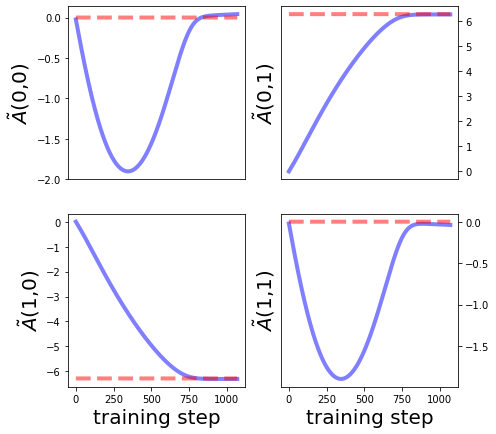

In [68]:
epochs = range(len(hist_A))
lbsize = 20
fig=plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(221+i)
    ax.plot(hist_A[:,i//2,i%2], linewidth=4, color="blue", alpha=0.5)
    ax.plot(epochs, [0,2*np.pi,-2*np.pi,0][i]*np.ones(len(epochs)), '--',linewidth=4, alpha=0.5, color="red")
allaxes = fig.get_axes()
for ind,ax in enumerate(allaxes):
    ax.set_xlabel("training step",size=lbsize)
    ax.set_ylabel(r'$\tilde{A}$'+"({},{})".format(ind//2,ind%2),size=lbsize)
    ax.tick_params(axis='both', which='major', labelsize=10)
    if ind%2 == 1:
        ax.yaxis.tick_right()
    if ind//2 == 0:
        ax.set_xticks([])
        ax.set_xlabel("")

Text(0, 0.5, 'cost value')

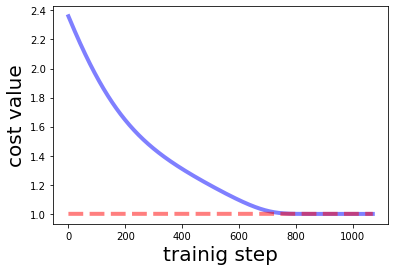

In [63]:
ax = plt.subplot(111)
ax.plot(hist_loss,  linewidth=4, alpha=0.5,color="blue")
ax.plot(epochs, np.ones(len(epochs)), '--', linewidth=4, alpha=0.5,color="red")

ax.set_xlabel("trainig step",size=lbsize)
ax.set_ylabel("cost value",size=lbsize)

In [67]:
hist_grads = hist_grads[:,0,:,:]

In [93]:
epochs = range(len(hist_A))
lbsize = 20
fig=plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(221+i)
    ax.plot(np.abs(hist_grads[:,i//2,i%2]), linewidth=4, color="blue", alpha=0.5)
    ax.set_yscale('log')

allaxes = fig.get_axes()
for ind,ax in enumerate(allaxes):
    ax.set_xlabel("training step",size=lbsize)
    ax.set_ylabel(r'$\nabla_\tilde{\theta}$'size=lbsize)
    ax.tick_params(axis='both', which='major', labelsize=10)
    if ind%2 == 1:
        ax.yaxis.tick_right()
    if ind//2 == 0:
        ax.set_xticks([])
        ax.set_xlabel("")

SyntaxError: invalid syntax (<ipython-input-93-91fbef53b5ab>, line 12)

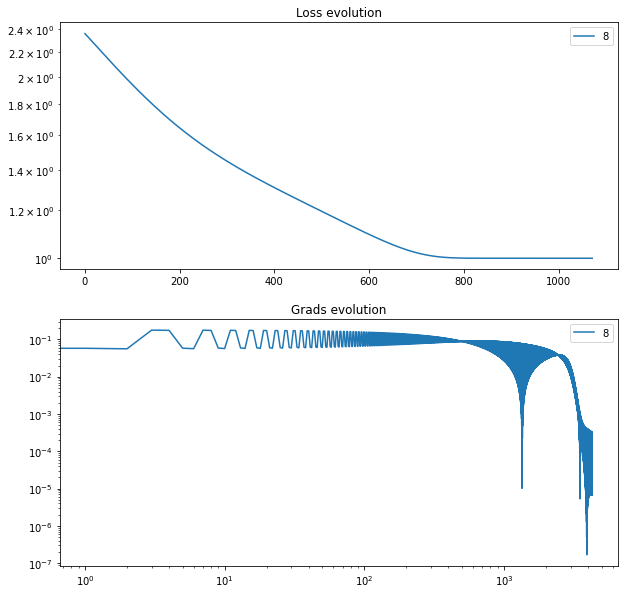

In [25]:
fig_size=(10,10)
fig = plt.figure(figsize=fig_size)

fig = display_histories(fig,{8:histories[8]})


In [15]:
for k in list(histories.keys()):
    print(histories[k][0][-1], "\n")

[[-2.059739   4.4097834]
 [-4.3744416 -2.049354 ]] 

[[ 0.8146367  3.730863 ]
 [-7.1218276 -2.8509052]] 

[[ 0.07154102  6.272844  ]
 [-6.3027706  -0.06883059]] 

[[-0.657994   5.8632574]
 [-5.95803   -0.6623667]] 

[[-2.1010683  4.306736 ]
 [-4.275709  -2.097026 ]] 

[[nan nan]
 [nan nan]] 

[[ 0.07154103  6.2728434 ]
 [-6.302771   -0.06883071]] 



ValueError: x and y can be no greater than 2-D, but have shapes (176,) and (176, 2, 2)

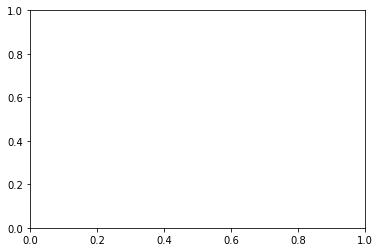

In [16]:
plt.plot(np.squeeze(histories[k][0]))
plt.plot([0,len(histories[k][0])], [np.pi*2]*2,'--', color="black")
plt.xlabel('gradient descent it')
plt.ylabel("parameter")

In [12]:
means, covs, signals, coeffs = load_data(get_def_path()+"{}periods/{}ppp/".format(periods,ppp))

In [10]:
A, dt, C, D = coeffs

In [12]:
A

array([[ 0.       ,  6.2831855],
       [-6.2831855,  0.       ]], dtype=float32)

In [2]:
from tqdm import tqdm 
import numpy as np
from misc import get_def_path
periods = 40
ppp=500

In [9]:
lss=[]
params=[]
for itraj in tqdm(range(1,1000)):
    
    convergence_path = get_def_path()+"{}periods/{}ppp/convergence/{}/".format(periods,ppp, itraj)
    try:

        params.append(np.load(convergence_path+"optimal_parameters.npy"))
        lss.append(np.load(convergence_path+"loss_evolution.npy"))    
    except Exception:
        pass

100%|██████████| 999/999 [00:24<00:00, 40.55it/s] 


In [10]:
cut_series = np.logspace(2,np.log10(ppp*periods),20)

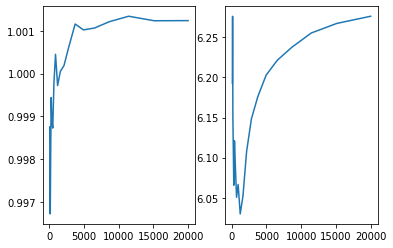

In [11]:
import matplotlib.pyplot as plt 
ax1, ax2 = plt.subplot2grid((1,2),(0,0)), plt.subplot2grid((1,2),(0,1))
ax1.plot(cut_series, np.mean(np.array(lss),axis=0))
ax2.plot(cut_series, np.mean(np.array(params),axis=0))

The gap here should be fisher info right?

Text(0, 0.5, 'std single param')

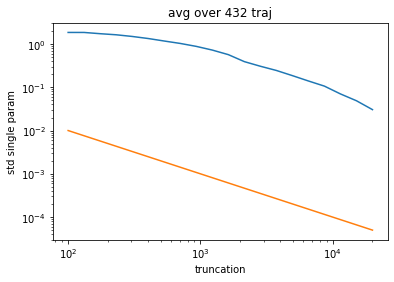

In [8]:
ax=plt.subplot(111)
ax.set_title("avg over {} traj".format(len(params)))
ax.plot(cut_series, np.std(np.array(params),axis=0))
ax.plot(cut_series, 1/cut_series)
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel("truncation")
ax.set_ylabel("std single param")